### Google play store (EDA)

### Import libraries

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
df=pd.read_csv("googleplaystore.csv")
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.shape

(10841, 13)

In [5]:
df.columns


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### تنظيف الداتا

### 1 Fix rating (هبدل كل كاتجوري بمتوسط الرتينج بتاعها)

In [9]:
df["Rating"] = df.groupby("Category")["Rating"].transform(lambda x: x.fillna(x.mean()))

In [10]:
df.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


### 2 Fix size (هوحد كل القيم للبايت)

In [12]:
def convert_size(size):
    if isinstance( size, str):
        if 'k' in size:
            return float(size.replace('k',"")) * 1024
        elif 'M' in size:
            return float(size.replace('M', "")) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

In [13]:
df['Size']=df['Size'].apply(convert_size)

In [14]:
df.Size

0        19922944.0
1        14680064.0
2         9122611.2
3        26214400.0
4         2936012.8
            ...    
10836    55574528.0
10837     3774873.6
10838     9961472.0
10839           NaN
10840    19922944.0
Name: Size, Length: 10841, dtype: object

In [15]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,55574528.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3774873.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.189143,3,9961472.0,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.500000,398307,19922944.0,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [16]:
# Renaming column to better understand we have converted size
df.rename(columns={'Size':'Size_in_Bytes'}, inplace=True) #inplace True is basically make the chnages True in your df
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
df['Size_in_Bytes'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10841 entries, 0 to 10840
Series name: Size_in_Bytes
Non-Null Count  Dtype 
--------------  ----- 
9146 non-null   object
dtypes: object(1)
memory usage: 84.8+ KB


In [18]:
df['Size_in_Bytes'] = pd.to_numeric(df['Size_in_Bytes'], errors='coerce')


In [19]:
df['Size_in_Bytes'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10841 entries, 0 to 10840
Series name: Size_in_Bytes
Non-Null Count  Dtype  
--------------  -----  
9145 non-null   float64
dtypes: float64(1)
memory usage: 84.8 KB


In [20]:
df['Size_in_Bytes'] = df['Size_in_Bytes'] / 1_048_576


In [21]:
df.rename(columns={'Size_in_Bytes':'Size_in_Mega'} ,inplace=True)

In [22]:
df.head(10)

,App,Category,Rating,Reviews,Size_in_Mega,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


### 3 fix price

In [24]:
df['Price'].value_counts()

Price
0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.75         1
$14.00        1
$4.85         1
$46.99        1
$1.04         1
Name: count, Length: 93, dtype: int64

In [25]:
df['Price'].loc[df['Price'].str.contains('$')].value_counts().sum()

10841

In [26]:
df['Price']=df['Price'].apply(lambda x: x.replace('$', "")if '$' in str(x) else(x))

In [27]:
df['Price'].value_counts()

Price
0        10040
0.99       148
2.99       129
1.99        73
4.99        72
         ...  
1.75         1
14.00        1
4.85         1
46.99        1
1.04         1
Name: count, Length: 93, dtype: int64

In [28]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [29]:
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10841, dtype: float64

In [30]:
df.describe()

,Rating,Size_in_Mega,Price
count,10841.000000,9145.000000,10840.000000
mean,4.191820,21.516165,1.027368
std,0.500681,22.589084,15.949703
min,1.000000,0.008301,0.000000
25%,4.047411,4.900000,0.000000
50%,4.259664,13.000000,0.000000
75%,4.500000,30.000000,0.000000
max,19.000000,100.000000,400.000000


### 4 fix category

In [32]:
df['Category'].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [33]:
df["Category"] = df["Category"].str.strip()


In [34]:
print(df["Category"].unique())


['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [35]:
df[df["Category"] == "1.9"]


,App,Category,Rating,Reviews,Size_in_Mega,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,NaN,Free,0,NaN,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [36]:
most_common_category = df["Category"].mode()[0]
df["Category"] = df["Category"].replace("1.9", most_common_category)


In [37]:
df['Category'].value_counts()

Category
FAMILY                 1973
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

In [38]:
print(df["Category"].isnull().sum())


0


### 5 Fix Android Version

In [40]:
df['Android Ver'].value_counts()

Android Ver
4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [41]:
most_common_version = df["Android Ver"].mode()[0]
df["Android Ver"] = df["Android Ver"].replace("Varies with device", most_common_version)


In [42]:
# استخراج الحد الأدنى من الإصدارات التي تحتوي على نطاقات
df["Android Ver"] = df["Android Ver"].apply(lambda x: x.split(" - ")[0] if "-" in str(x) else x)


In [43]:
# تعويض القيم المفقودة بالقيمة الأكثر شيوعًا
df["Android Ver"] = df["Android Ver"].fillna(most_common_version)

In [44]:
# إزالة الإصدارات النادرة جدًا (أقل من 5 مرات)
version_counts = df["Android Ver"].value_counts()
rare_versions = version_counts[version_counts < 5].index
df = df[~df["Android Ver"].isin(rare_versions)]

In [45]:
print(df["Android Ver"].value_counts())


Android Ver
4.1 and up      3816
4.0.3 and up    1501
4.0 and up      1375
4.4 and up       980
2.3 and up       652
5.0 and up       601
4.2 and up       394
2.3.3 and up     281
2.2 and up       244
4.3 and up       243
3.0 and up       241
2.1 and up       134
1.6 and up       116
6.0 and up        60
7.0 and up        42
3.2 and up        36
2.0 and up        32
5.1 and up        24
1.5 and up        20
4.4W and up       12
3.1 and up        10
2.0.1 and up       7
8.0 and up         6
Name: count, dtype: int64


### fix installs column

In [47]:
df['Installs']=df['Installs'].apply(lambda x: x.replace('+',"") if '+' in str(x) else x)

In [48]:
 df['Installs'].value_counts()

Installs
1,000,000        1577
10,000,000       1249
100,000          1169
10,000           1052
1,000             907
5,000,000         751
100               718
500,000           539
50,000            477
5,000             477
100,000,000       407
10                386
500               330
50,000,000        289
50                205
5                  81
500,000,000        72
1                  67
1,000,000,000      58
0                  15
Free                1
Name: count, dtype: int64

In [49]:
#now remove commas
df['Installs']=df['Installs'].apply(lambda x: x.replace(',',"") if ',' in str(x) else x)

In [50]:
df['Installs'].value_counts()

Installs
1000000       1577
10000000      1249
100000        1169
10000         1052
1000           907
5000000        751
100            718
500000         539
50000          477
5000           477
100000000      407
10             386
500            330
50000000       289
50             205
5               81
500000000       72
1               67
1000000000      58
0               15
Free             1
Name: count, dtype: int64

In [51]:
# 6️⃣ إزالة القيم المتطرفة
# دالة لحذف القيم المتطرفة باستخدام IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [52]:
# df["Reviews"] = df["Reviews"].astype(int)

In [53]:
# # التأكد من أن القيم رقمية
# df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
# df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce")
# df["Installs"] = pd.to_numeric(df["Installs"], errors="coerce")

# # إزالة أي صف يحتوي على قيم غير رقمية بعد التحويل
# df = df.dropna(subset=["Price", "Reviews", "Installs"])


In [54]:
# df = remove_outliers(df, "Price")
# df = remove_outliers(df, "Reviews")
# df = remove_outliers(df, "Installs")

In [55]:
df.describe()

,Rating,Size_in_Mega,Price
count,10827.000000,9132.000000,10826.000000
mean,4.191800,21.527960,1.028697
std,0.500849,22.592321,15.959971
min,1.000000,0.010742,0.000000
25%,4.047411,4.900000,0.000000
50%,4.259664,13.000000,0.000000
75%,4.500000,30.000000,0.000000
max,19.000000,100.000000,400.000000


### Analytical Questions:

### What is the most expensive app on the Play Store?

In [58]:
df_most_expensive = df[df['Price'] > 0].nlargest(10, 'Price')
print("\the most expensive app on the Play Store:")
print(df_most_expensive[['App', 'Price']])


	he most expensive app on the Play Store:
                                 App   Price
4367        I'm Rich - Trump Edition  400.00
4197          most expensive app (H)  399.99
4362                      💎 I'm rich  399.99
5351                       I am rich  399.99
5354                  I am Rich Plus  399.99
5356               I Am Rich Premium  399.99
5358                      I am Rich!  399.99
5359              I am rich(premium)  399.99
5362                   I Am Rich Pro  399.99
5364  I am rich (Most expensive app)  399.99


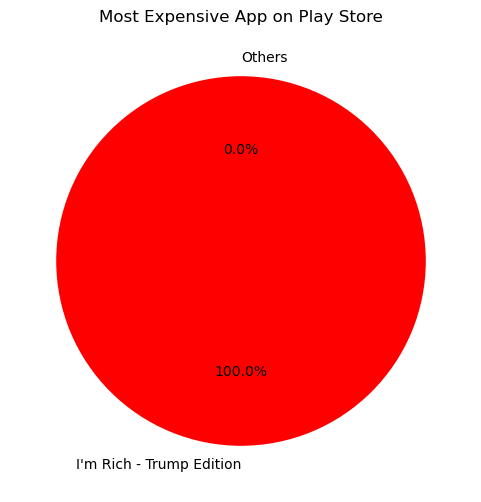

In [198]:
plt.figure(figsize=(6,6))
plt.pie([most_expensive_app['Price'], df['Price'].max() - most_expensive_app['Price']], 
        labels=[most_expensive_app['App'], 'Others'], 
        autopct='%1.1f%%', colors=['red', 'gray'], startangle=90)
plt.title('Most Expensive App on Play Store')
plt.show()


### Which genre has the highest number of apps?

In [60]:
most_common_genre = df["Genres"].value_counts().idxmax()
num_apps_in_genre = df["Genres"].value_counts().max()

print(f"The genre with the highest number of apps is: {most_common_genre} with {num_apps_in_genre} apps.")


The genre with the highest number of apps is: Tools with 839 apps.


C:\Users\Hosopa\AppData\Local\Temp\ipykernel_18064\2865565519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette='viridis')


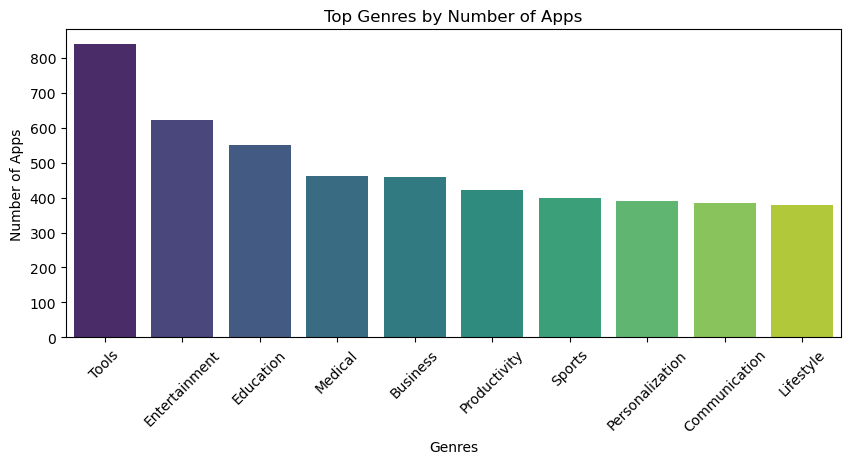

In [200]:
genre_counts = df['Genres'].value_counts()
plt.figure(figsize=(10, 4))
sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Number of Apps')
plt.title('Top Genres by Number of Apps')
plt.show()


### What is the average size of free vs. paid apps?

In [62]:
avg_size_free = df[df['Price'] == 0]['Size_in_Mega'].mean()
avg_size_paid = df[df['Price'] > 0]['Size_in_Mega'].mean()

print(f"Average size of free apps: {avg_size_free:.2f} MB")
print(f"Average size of paid apps: {avg_size_paid:.2f} MB")


Average size of free apps: 21.72 MB
Average size of paid apps: 19.31 MB


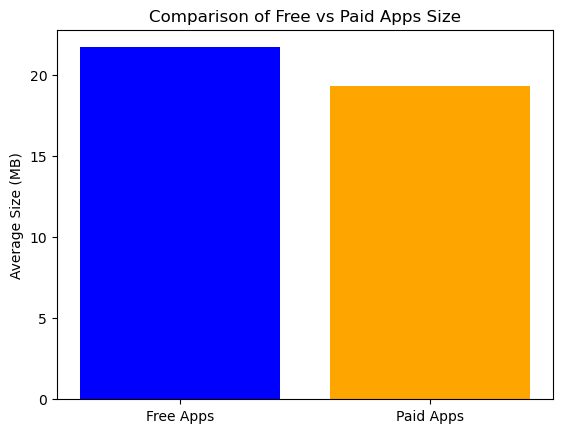

In [63]:
labels = ['Free Apps', 'Paid Apps']
sizes = [avg_size_free, avg_size_paid]

plt.bar(labels, sizes, color=['blue', 'orange'])
plt.ylabel('Average Size (MB)')
plt.title('Comparison of Free vs Paid Apps Size')
plt.show()

### What are the top 5 most expensive apps with a perfect rating (5)?

In [117]:
top_expensive_apps = df[df["Rating"] == 5].nlargest(5, "Price")[["App", "Category", "Price", "Rating"]]
print(top_expensive_apps)


                                            App Category  Price  Rating
5489                  AP Art History Flashcards   FAMILY  29.99     5.0
7477                 USMLE Step 2 CK Flashcards   FAMILY  19.99     5.0
5246                      Hey AJ! It's Bedtime!   FAMILY   4.99     5.0
5482                 meStudying: AP English Lit   FAMILY   4.99     5.0
7204  TI-84 CE Graphing Calculator Manual TI 84   FAMILY   4.99     5.0


C:\Users\Hosopa\AppData\Local\Temp\ipykernel_18064\3880177352.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Price", y="App", data=top_expensive_apps, palette="viridis")


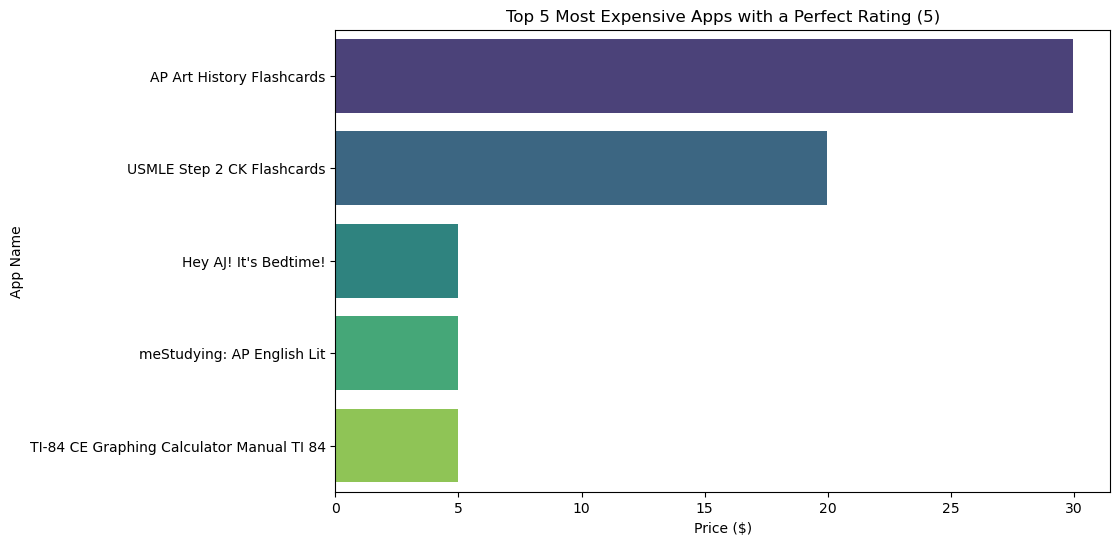

In [121]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Price", y="App", data=top_expensive_apps, palette="viridis")
plt.xlabel("Price ($)")
plt.ylabel("App Name")
plt.title("Top 5 Most Expensive Apps with a Perfect Rating (5)")
plt.show()

### How many apps have received more than 50K reviews?

In [127]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [129]:
num_apps = df[df['Reviews'] > 50000].shape[0]
print("Number of apps with more than 50K reviews:", num_apps)


Number of apps with more than 50K reviews: 2778


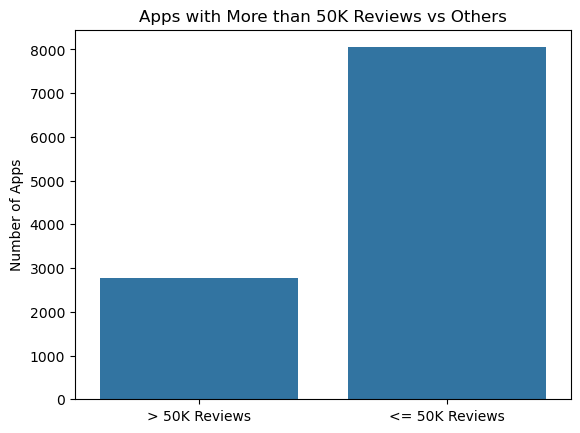

In [131]:
apps_above_50k = df[df['Reviews'] > 50000].shape[0]
apps_below_50k = df[df['Reviews'] <= 50000].shape[0]

sns.barplot(x=['> 50K Reviews', '<= 50K Reviews'], y=[apps_above_50k, apps_below_50k])
plt.ylabel("Number of Apps")
plt.title("Apps with More than 50K Reviews vs Others")
plt.show()

In [137]:
df['Installs'] = df['Installs'].astype(str).str.replace(r'[+,]', '', regex=True).astype(float)


### What is the average price of apps, grouped by genre and number of installs?

In [143]:
avg_price = df.groupby(['Genres', 'Installs'])['Price'].mean().reset_index()
print(avg_price)

     Genres    Installs     Price
0    Action        10.0  0.000000
1    Action        50.0  0.663333
2    Action       100.0  1.096000
3    Action       500.0  0.000000
4    Action      1000.0  0.372500
..      ...         ...       ...
916    Word    100000.0  0.000000
917    Word   1000000.0  0.000000
918    Word   5000000.0  0.000000
919    Word  10000000.0  0.000000
920    Word  50000000.0  0.000000

[921 rows x 3 columns]


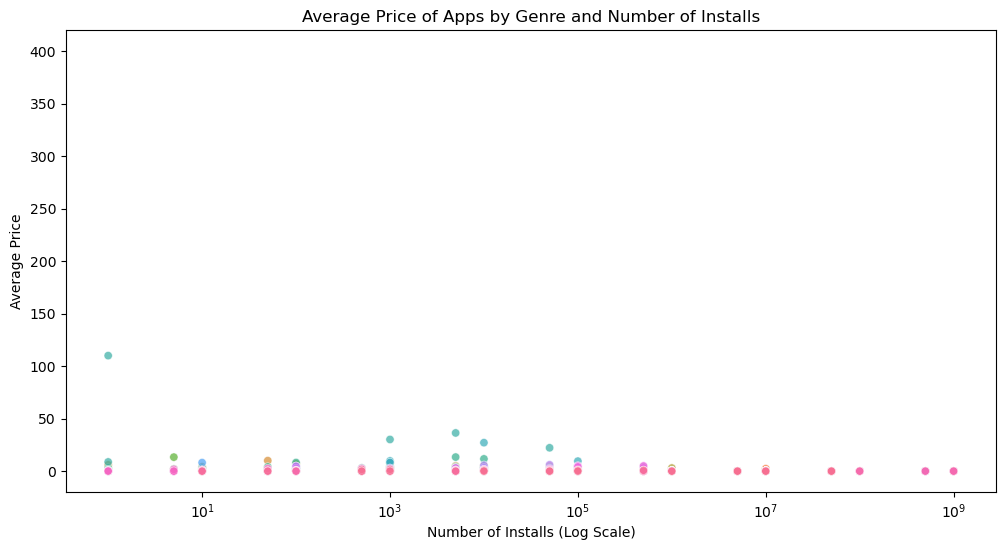

In [141]:

avg_price = df.groupby(['Genres', 'Installs'])['Price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=avg_price, x='Installs', y='Price', hue='Genres', alpha=0.7)
plt.xscale('log')
plt.xlabel("Number of Installs (Log Scale)")
plt.ylabel("Average Price")
plt.title("Average Price of Apps by Genre and Number of Installs")
plt.legend([], [], frameon=False)  # إخفاء الليجند لو كان كبيرًا
plt.show()


### How many apps have a rating higher than 4.7, and what is their average price?

In [152]:
filtered_apps = df[df['Rating'] > 4.7]
num_apps = filtered_apps.shape[0]
avg_price = filtered_apps['Price'].mean()

print(f"Number of apps: {num_apps}")
print(f"Average price: {avg_price:.2f}")


Number of apps: 596
Average price: 0.50


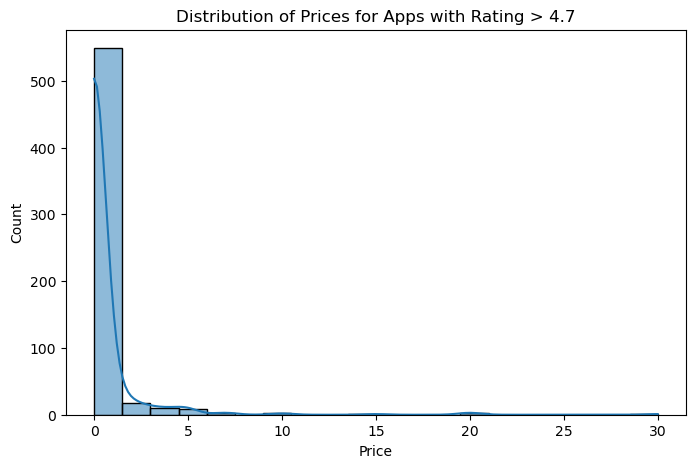

In [154]:
plt.figure(figsize=(8, 5))
sns.histplot(filtered_apps['Price'], bins=20, kde=True)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Prices for Apps with Rating > 4.7')
plt.show()

### What is Google&#39;s estimated revenue from apps with 5,000,000+ installs?
(Assuming Google takes a 30% cut from app sales)

In [157]:
high_install_apps = df[df['Installs'] >= 5_000_000]
total_revenue = (high_install_apps['Price'] * high_install_apps['Installs']).sum()
google_revenue = total_revenue * 0.3  

print(f"Google's estimated revenue: ${google_revenue:,.2f}")


Google's estimated revenue: $44,910,000.00


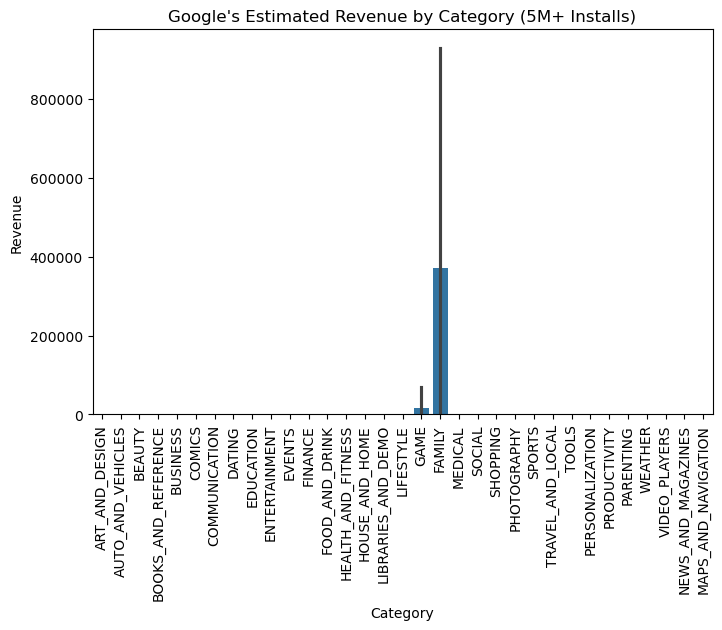

In [159]:
plt.figure(figsize=(8, 5))
sns.barplot(x=high_install_apps['Category'], y=high_install_apps['Price'] * high_install_apps['Installs'])
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.title("Google's Estimated Revenue by Category (5M+ Installs)")
plt.show()


### What are the maximum and minimum sizes of free vs. paid apps?

In [164]:
size_stats = df.groupby('Type')['Size_in_Mega'].agg(['min', 'max'])
print(size_stats)


           min    max
Type                 
0          NaN    NaN
Free  0.010742  100.0
Paid  0.013672  100.0


<Figure size 600x400 with 0 Axes>

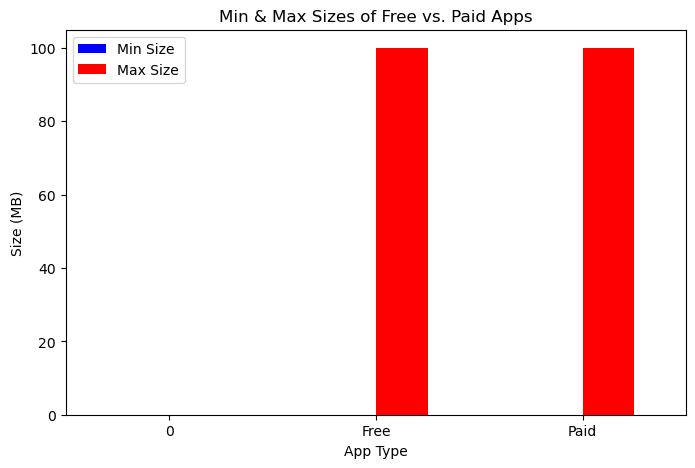

In [166]:
plt.figure(figsize=(6, 4))
size_stats.plot(kind='bar', figsize=(8, 5), color=['blue', 'red'])
plt.xlabel('App Type')
plt.ylabel('Size (MB)')
plt.title('Min & Max Sizes of Free vs. Paid Apps')
plt.xticks(rotation=0)
plt.legend(['Min Size', 'Max Size'])
plt.show()


### Is there a correlation between an app’s rating, number of reviews, size, and its price?

In [173]:
correlation_matrix = df[['Rating', 'Reviews', 'Size_in_Mega', 'Price']].corr()
print(correlation_matrix)


                Rating   Reviews  Size_in_Mega     Price
Rating        1.000000  0.068291      0.079434 -0.020388
Reviews       0.068291  1.000000      0.238301 -0.009677
Size_in_Mega  0.079434  0.238301      1.000000 -0.023056
Price        -0.020388 -0.009677     -0.023056  1.000000


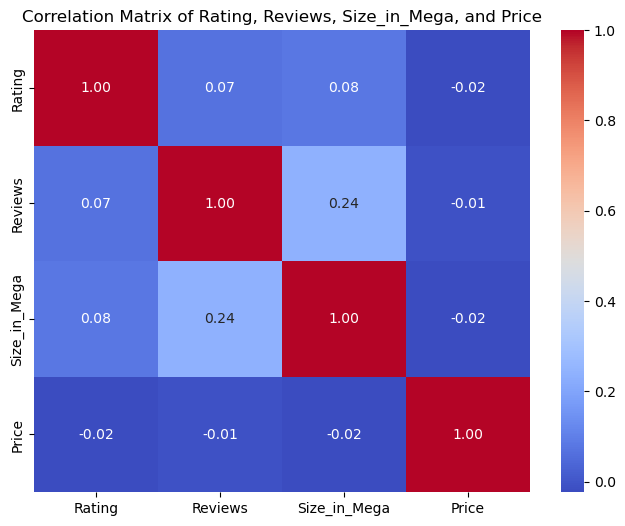

In [175]:

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Rating, Reviews, Size_in_Mega, and Price')
plt.show()


### How many apps exist for each type (free/paid) across different content ratings?

In [178]:
apps_count = df.groupby(['Content Rating', 'Type']).size().unstack()
print(apps_count)


Type               Free   Paid
Content Rating                
Adults only 18+     3.0    NaN
Everyone         8005.0  695.0
Everyone 10+      380.0   33.0
Mature 17+        479.0   20.0
Teen             1156.0   52.0
Unrated             2.0    NaN


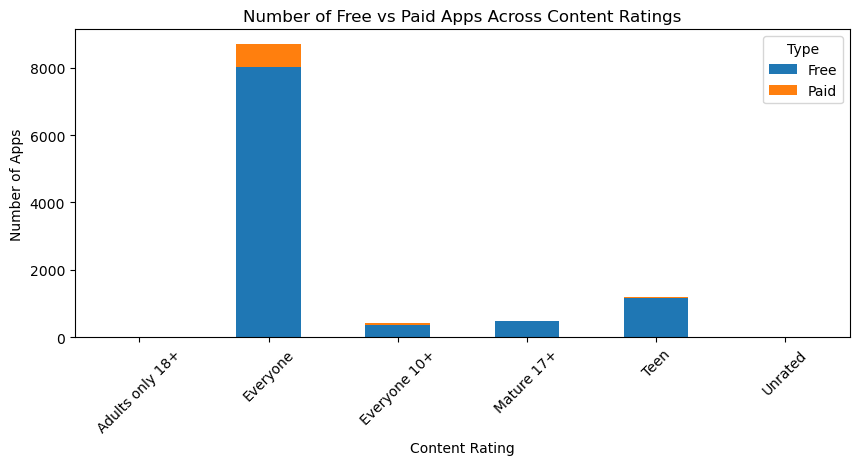

In [202]:
apps_count.plot(kind='bar', stacked=True, figsize=(10,4))
plt.title('Number of Free vs Paid Apps Across Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.show()


### How many apps are compatible with Android version 4.x?

In [183]:
android_4x_apps = df[df['Android Ver'].str.startswith('4.')].shape[0]
print(f'Number of apps compatible with Android 4.x: {android_4x_apps}')


Number of apps compatible with Android 4.x: 8321


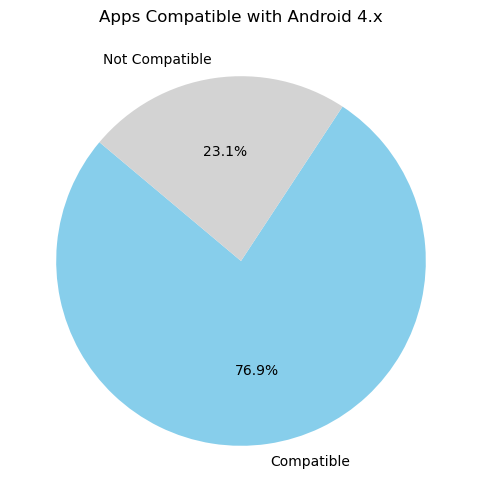

In [185]:
labels = ['Compatible', 'Not Compatible']
sizes = [android_4x_apps, df.shape[0] - android_4x_apps]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgray'], startangle=140)
plt.title('Apps Compatible with Android 4.x')
plt.show()
